# EJERCICIO DE REGRESION LINEAL

## Introducción

El análisis de regresión está diseñado para situaciones en las que un investigador piensa
que una variable está relacionada con una o más mediciones realizadas, normalmente sobre el mismo
objeto. El propósito del análisis es utilizar los datos (valores observados de las variables) 
para estimar la forma de esta relación. (Searle, 2017)

Un ejemplo sería utilizar información sobre la renta y el número de años de escolaridad
formal (más allá del sexto grado) para estimarla medida en que los ingresos anuales de una
persona están relacionados con sus años de escolarización. (Searle, 2017)

## [Breve historia](https://prezi.com/qpxysldecq4u/regresion-lineal/)


## Algoritmo


La idea detrás de la regresión lineal es la de poder estimar el valor de los parámetros de un modelo
lineal minimizando la desviación entre los valores predichos y los valores observados, como en la figura siguiente

<figure>
<center>
"<img src="../figs/ideareg.jpg" width="300" height="300" align="center"/> 

</center>
<figcaption>
<p style="text-align:center">Trazando una línea
</figcaption>
</figure>



In [1]:
    #"<img src="../tree/figs/ideareg.jpg" width="300" height="300" align="center"/> en note
   # <img src="../figs/ideareg.jpg" width="300" height="300" align="center"/> en lab

Eso se logra entre otros métdos, con el algoritmo de los Mínimos cuadrados ordinarios
que trataremos brevemente y se puede resumir en dos dimensiones en la siguiente figura:

<figure>
<center>
<img src="../figs/ols.jpg" width="300" height="300" align="center"/>

</center>
<figcaption>
<p style="text-align:center">Representación del MCO
</figcaption>
</figure>


In [ ]:
    #"<img src="../tree/figs/ols.jpg" width="300" height="300" align="center"/> en note para html
   # <img src="../figs/ols.jpg" width="300" height="300" align="center"/> en lab para nbviewr

En forma matricial, el modelo se puede expresar de la siguiente forma:

$$ Y=X\beta+e $$ 
$$   \hat{Y}=X\beta $$
$$ e=  Y-X\beta$$ 


Siguiento a Searl, 2017 en su capítulo 3 (Regression for the Full-Rank Model), en donde están todas las demostraciones,  se muestra un resumen del proeceso de ajuste, empezando por la función a minimizar, la cual es ls suma de cuadrados de los residuos.

Si $ e\sim N\left( 0,\sigma^{2} \mathbb{I}\right)$ entonces
$$\min f:\sum_{}^{}e^{2}=e^{T}e=\left( Y-X\beta \right)^{T}\left( Y-X\beta \right) $$

La solución es explíta:

$$ \hat{\beta}=\left( X^{T}X \right)^{-1}\left( X^{T}Y \right) $$

Reorganizando términos se encuentra una matriz importante denominada **Matriz Hat** y denotada $H$

$$ \hat{H}=X\left( X^{T}X \right)^{-1}\left( X^{T} \right) $$

Tanto estimaciónes como residuos se calculan directamente como el producto de la Matriz Hat y el vector de observaciones $Y$

$$   \hat{Y}=\hat{H}Y $$

$$   \hat{e}=Y-\hat{Y}=Y-\hat{H}Y = \left( \mathbb{I} - H\right)Y$$

Es el fin pues, de este algoritmo, encontrar predicciones a partir de la estimación e interpretación del vector de parámetros $\beta$. 

Así mismo, siendo los datos observados una muestra, se hace inferencia sobre parámetros, respuesta media, respuesta indiviudal y también el clásico anaálisis de varianza.

La varianza de los estimadores se muestra a continuación:

$$  \text{VAR}\left( \hat{\beta} \right)=\sigma^{2}\left( X^{T}X \right)^{-1}$$
$$  \text{VAR}\left( \hat{Y} \right)=\sigma^{2}\text{Diag}\left(H\right)$$
$$  \text{VAR}\left( Y-\hat{Y} \right)=\sigma^{2}\text{Diag}\left(\mathbb{I}+H\right)$$

Esta es la forma matricial de las sumas de cuadrados y del cuadrado medio del error

$$ SST=Y^{T}\left( \mathbb{I}_{n}-\frac{1}{n}\mathbb{J_{n}}  \right)Y$$
$$ SSE=Y^{T}\left( \mathbb{I}_{n} - H  \right)Y$$
$$ \hat{\sigma}^{2} = \left( \frac{1}{n-p}\right) Y^{T}\left( \mathbb{I}_{n} - H  \right)Y$$

Los grados de libertad para la prueba $F$ en el análisis de varianza son $p-1$ y $n-p$

Los grados de libertad de la distribución $t$ son $n-p$


## Implementación del algoritmo con datos

Para este ejemplo se utilizó una base de datos encontrada en Peña, 2002 (página 214, Tabla A6 MUNDODES)
Este conjunto de datos consta de 91 observaciones y 6 variables. 

Las observaciones corresponden a 91 países. Las variables son indicadores de desarrollo.
Las seis variables son :

    -Tasa Nat.: Ratio de natalidad por 1000 habitantes
    
    -Tasa Mort: Ratio de mortalidad por 1000 habitantes
    
    -Mort.Inf: Mortalidad infantil (por debajo de un año)
    
    -Esp.Hom: Esperanza de vida en hombres
    
    -Esp.Muj.: Esperanza de vida en mujeres
    
    -PNB: Producto Nacional Bruto per cápita
    

En el ejemplo se tratará de predecir la esperanza de vida de las mujeres conocida la tasa de natalidad, la de mortalidad y el PNB

El notebook se hizo siguiendo la página  [Aprende Machine Learning](https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/)

#### PREÁMBULO DE PAQUETES

In [6]:
import scipy.stats as stats
import math as mt
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import matrix_rank
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### CARPETA DE DATOS

In [7]:
import os
os.chdir("E:\DOCTORADO UNIVALLE\Doctorado\datos")
os.getcwd()

'E:\\DOCTORADO UNIVALLE\\Doctorado\\datos'

#### CARGA DE DATOS

In [8]:
#cargamos los datos de entrada
data = pd.read_csv("mundo2.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(91, 7)

In [9]:
### pruebas de dataframes y arrays
#print(data)

matriz = pd.read_csv("mundo2.csv").values
#print (matriz)

array = data.to_numpy()
#print(array)

#### OBSERVACION DEL DATA SET

In [10]:
#data.head()

#### DESCRIPTIVAS DE LOS DATOS

In [11]:

#data.describe()

#### FIGURAS INICIALES

In [13]:

#data.drop(['Title','url', 'Elapsed days'],1).hist()
#data.hist()
#plt.show()

#### SCATTER PLOT VARIABLES DE INTERES

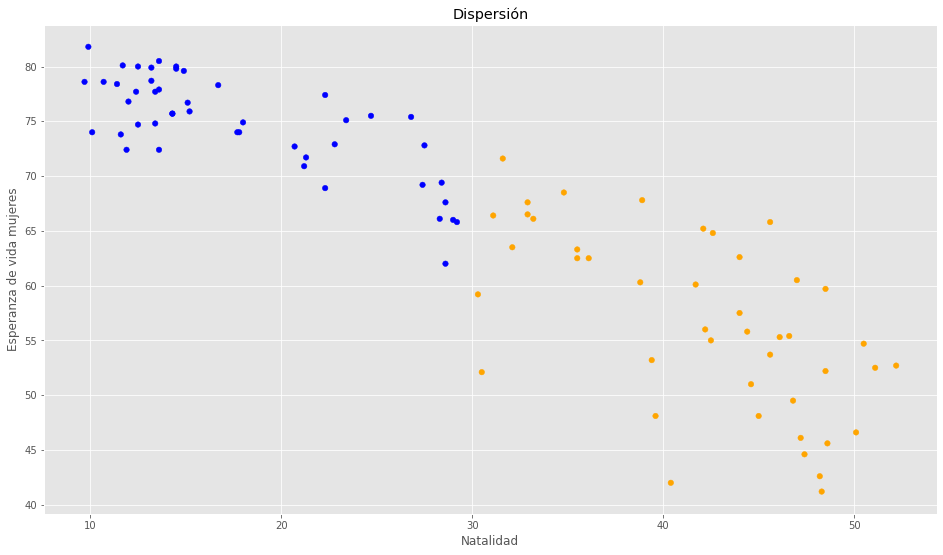

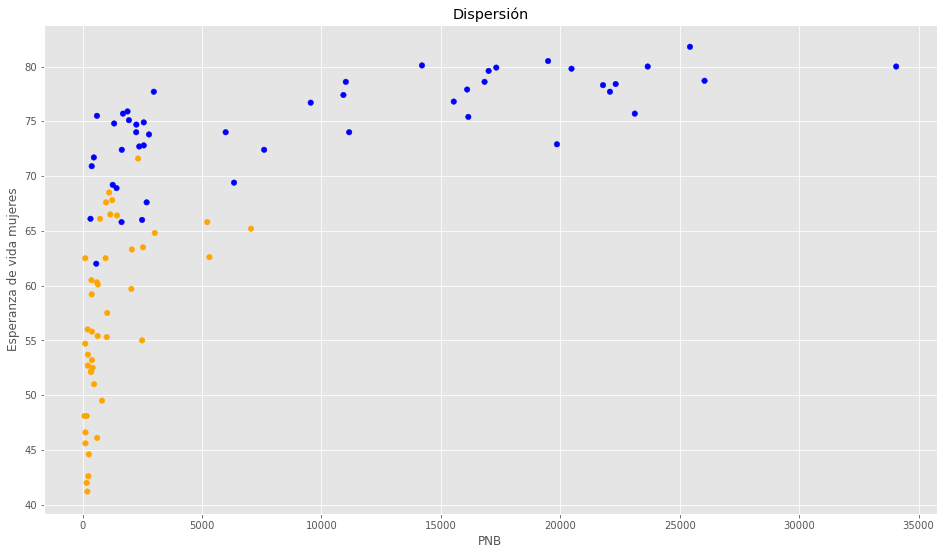

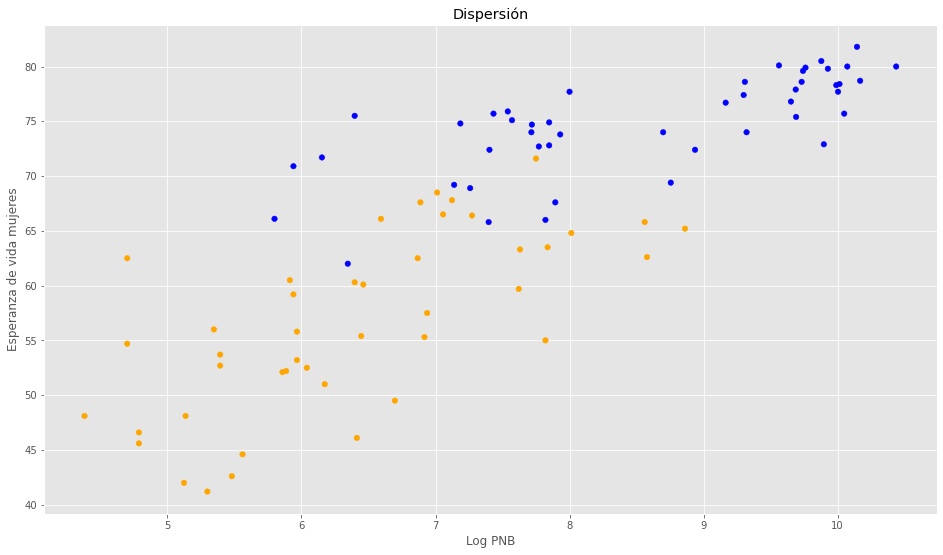

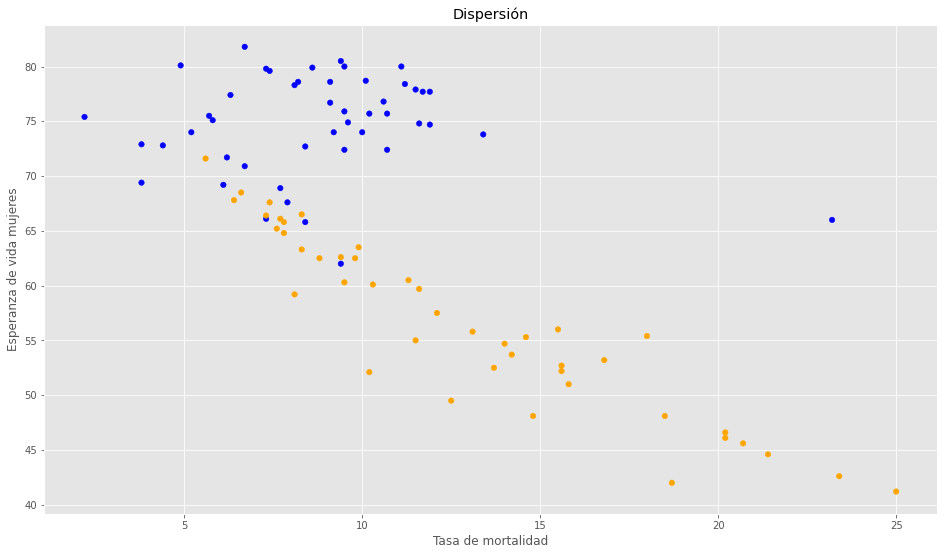

In [14]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = data['natal'].values
f2 = data['esp_mujer'].values
f3 = data['pnb'].values
f4 = data['mortal'].values
f5 = np.log(f3)

# Vamos a pintar en 2 colores los puntos por debajo de la media de LA TASA DE NATALIDAD
asignar=[]
for index, row in data.iterrows():
    if(row['natal']>29.4):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.xlabel('Natalidad')
plt.ylabel('Esperanza de vida mujeres')
plt.title('Dispersión')
plt.show()

plt.scatter(f3, f2, c=asignar, s=tamanios[0])
plt.xlabel('PNB')
plt.ylabel('Esperanza de vida mujeres')
plt.title('Dispersión')
plt.show()

plt.scatter(f5, f2, c=asignar, s=tamanios[0])
plt.xlabel('Log PNB')
plt.ylabel('Esperanza de vida mujeres')
plt.title('Dispersión')
plt.show()

plt.scatter(f4, f2, c=asignar, s=tamanios[0])
plt.xlabel('Tasa de mortalidad')
plt.ylabel('Esperanza de vida mujeres')
plt.title('Dispersión')
plt.show()

#### *Creación* **de** ***MATRICES*** $X$ e $Y$

In [15]:
dX = pd.DataFrame()
dY = pd.DataFrame()

dX['unitaria']=data['unitaria']
dX['natal']=data['natal']
dX['mortal']=data['mortal']
dX['logpnb']=np.log(data['pnb'].values)

dY['esp_mujer']=data['esp_mujer']

#print(dX)
#print(dY)

X=np.array(dX)
Y=np.array(dY)

#print(X)
#print(Y)

n=X.shape[0]
p=matrix_rank(X)

idn=np.identity(n)
jn=np.ones(n)

print(n)
print(p)

91
4


#### INVERSA DE $X´X$

In [16]:
Xt=X.transpose()
Yt=Y.transpose()
g2=inv(np.matmul(Xt,X))

In [17]:
##Betas

b=np.matmul(g2,np.matmul(Xt,Y))
print(b)

[[73.62311634]
 [-0.44798547]
 [-0.71126835]
 [ 1.76264178]]


In [18]:
##Matrix Hat
H = np.matmul(X,np.matmul(g2,Xt))
print(H.shape)

(91, 91)


In [19]:
## Estimaciones

yest=np.matmul(H,Y)
print(yest.shape)

### matrix to dataframe
# sample numpy array
#arr = np.array([[70, 90, 80], [68, 80, 93]])
# convert to pandas dataframe with custom index and column names
#df = pd.DataFrame(arr, columns=['History', 'Physics', 'Math'], index=['Sam', 'Emma'])

# print
#print("Numpy array:\n", arr)
#print("\nPandas dataframe:\n", df)

#El último código es para pasar matrices a pandas dataframe

(91, 1)


In [20]:
## Varianza residual y RMSE

A = np.add(idn,-np.matmul(np.matmul(X,g2),Xt))
YAY=np.matmul(Yt,np.matmul(A,Y))
s2=(1/(n-p))*YAY
s=np.sqrt(s2)

print("Cuadrado medio residual", s2)
print("RMSE",s)
#s2=(1/(n-p))*y`*(in-x*GINV(x`*x)*x`)*y;
#s=SQRT(s2);

Cuadrado medio residual [[10.05922101]]
RMSE [[3.1716275]]


In [21]:
### ANÁLISIS DE VARIANZA

sst = np.matmul(Yt,np.matmul(np.add(idn,(-1/n*jn)),Y))
sse = YAY
ssm = np.add(sst,-sse)

glt = n-1
gle = n-p
glm = glt - gle

cmreg= ssm/glm
cme  = sse/gle

F_valor=cmreg/cme

P_valor=1-stats.f.cdf(F_valor, glm, gle)


print("    FV   ",  "gl", "    S Cuad    ","        C Medio    ",  "       F valor", "           P Valor")

print("Regresión", glm,ssm,cmreg,F_valor,P_valor)
print("Error    ", gle,sse,cme)

#sst=y`*(in-(1/n)*jn)*y;
#sse=y`*(in-x*GINV(x`*x)*x`)*y;
#ssm=sst-sse;





    FV    gl     S Cuad             C Medio            F valor            P Valor
Regresión 3 [[10275.12161798]] [[3425.04053933]] [[340.48765155]] [[1.11022302e-16]]
Error     87 [[875.15222817]] [[10.05922101]]


In [23]:
## Varianzas de las estimaciones
#************Varianzas de las estimaciones;
#varcobbeta=s2*g2;
#varbeta=vecdiag(varcobbeta);
#sbeta=sqrt(varbeta);
#vary=s2*vecdiag(H);
#sy=sqrt(vary);
#varpred=s2*(vecdiag(H)+jn);
#spred=sqrt(varpred);
varcobbeta=s2*g2
print(varcobbeta.shape)
varbeta=(np.diagonal(varcobbeta)).reshape(-1,1)
#varbeta=varbeta1.reshape(-1,1) # para fila (1,-1)
sbeta=np.sqrt(varbeta)

vary=s2*np.diagonal(H).reshape(-1,1)

varpred=s2*(np.diagonal(np.add(H,jn))).reshape(-1,1)
spred=2*np.sqrt(varpred)

print(varbeta.shape)
print(vary.shape)
print(spred.shape)
print(sbeta)


(4, 4)
(4, 1)
(91, 1)
(91, 1)
[[3.40051176]
 [0.03685509]
 [0.08571226]
 [0.31116669]]


In [44]:
vals = stats.t.ppf([0.975], gle)
piv=vals*sbeta

Li=b-piv
Ls=b+piv


print ("  Término   ", "    Estimación", "     Lím Inf (95%)", "     Lím sup (95%)")
print ("Intercepto  ", b[0,0], Li[0,0], Ls[0,0] )
print ("Natalidad   ", b[1,0], Li[1,0], Ls[1,0] )
print ("Mortalidad  ", b[2,0], Li[2,0], Ls[2,0] )
print ("Log PNB     ", b[3,0], Li[3,0], Ls[3,0] )

  Término        Estimación      Lím Inf (95%)      Lím sup (95%)
Intercepto   73.62311634038815 66.86423100614931 80.38200167462699
Natalidad    -0.44798547066685046 -0.5212389514481534 -0.37473198988554757
Mortalidad   -0.7112683483204307 -0.881630741913992 -0.5409059547268694
Log PNB      1.7626417788465005 1.1441642956252336 2.3811192620677675


#### Ahora con SKLEARN

In [47]:
dXts = pd.DataFrame()
dXt = pd.DataFrame()
dYt = pd.DataFrame()

dXt['natal']=data['natal']
dXt['mortal']=data['mortal']
dXt['logpnb']=np.log(data['pnb'].values)

dXts['logpnb']=np.log(data['pnb'].values)

dYt['esp_mujer']=data['esp_mujer']

#print(dX)
#print(dY)

X_ts=np.array(dXts)
X_t=np.array(dXt)
Y_t=np.array(dYt)
print(X_ts.shape)

(91, 1)


REgresión Simple Esperanza de vida en función del log PNB

In [48]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_ts, Y_t)


Y_pred = regr.predict(X_ts)
Y1_pred=5.573*X_ts+24.17

# Veamos los coeficienetes obtenidos, 
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(Y_t, Y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(Y_t, Y_pred))

Coefficients: 
 [[5.5728484]]
Independent term: 
 [24.16962479]
Mean squared error: 39.46
Variance score: 0.68


FIGURA DE LA RECTA

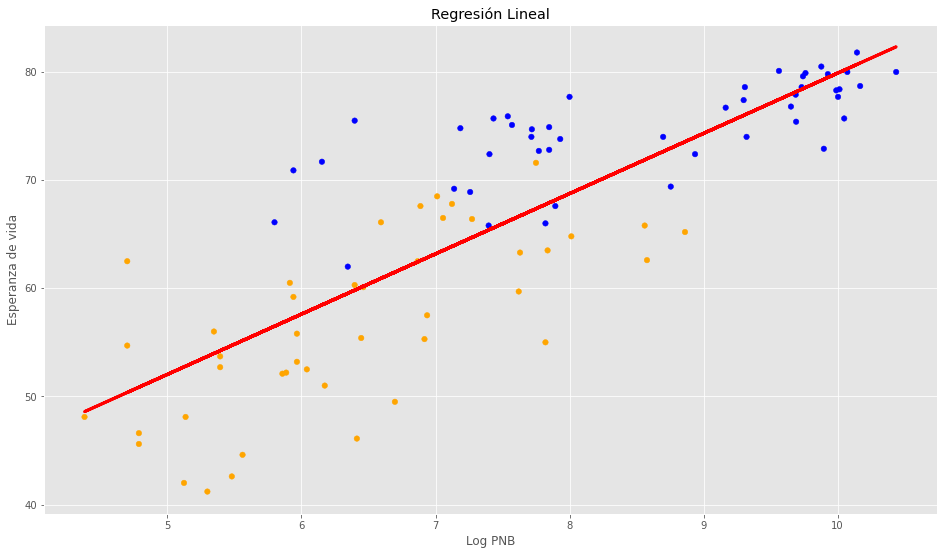

In [49]:
plt.scatter(X_ts[:,0], Y_t,  c=asignar, s=tamanios[0])
#plt.scatter(X_ts[:,0], Y1_pred, color='red')
plt.plot(X_ts[:,0], Y_pred, color='red', linewidth=3)

plt.xlabel('Log PNB')
plt.ylabel('Esperanza de vida')
plt.title('Regresión Lineal')

plt.show()

USO DEL MODELO PARA UNA PREDICCION

In [50]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_6 = regr.predict([[6]])
print(int(y_6))

57


REGRESION MULTIPLE

In [51]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(X_t, Y_t)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
Y_predm = regr2.predict(X_t)

# Los coeficientes
print('Independent term: \n', regr2.intercept_)
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(Y_t, Y_predm))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(Y_t, Y_predm))

Independent term: 
 [73.62311634]
Coefficients: 
 [[-0.44798547 -0.71126835  1.76264178]]
Mean squared error: 9.62
Variance score: 0.92


In [52]:
## REGRESION MULTIPLE CON DOS VARIABLES PARA GRAFICAR EN EL PLANO

REGRESION AL PLANO

In [53]:
dXt2 = pd.DataFrame()


dXt2['mortal']=data['mortal']
dXt2['logpnb']=np.log(data['pnb'].values)
X_t2=np.array(dXt2)

print(X_t2.shape)

(91, 2)


In [54]:
regr3 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr3.fit(X_t2, Y_t)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
Y_pred2 = regr3.predict(X_t2)

# Los coeficientes
print('Independent term: \n', regr3.intercept_)
print('Coefficients: \n', regr3.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(Y_t, Y_pred2))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(Y_t, Y_pred2))

Independent term: 
 [44.52772463]
Coefficients: 
 [[-0.92695797  4.18725306]]
Mean squared error: 25.95
Variance score: 0.79


[[ 0.   7.5 15.  22.5 30. ]
 [ 0.   7.5 15.  22.5 30. ]]
[[ 4.  4.  4.  4.  4.]
 [12. 12. 12. 12. 12.]]


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

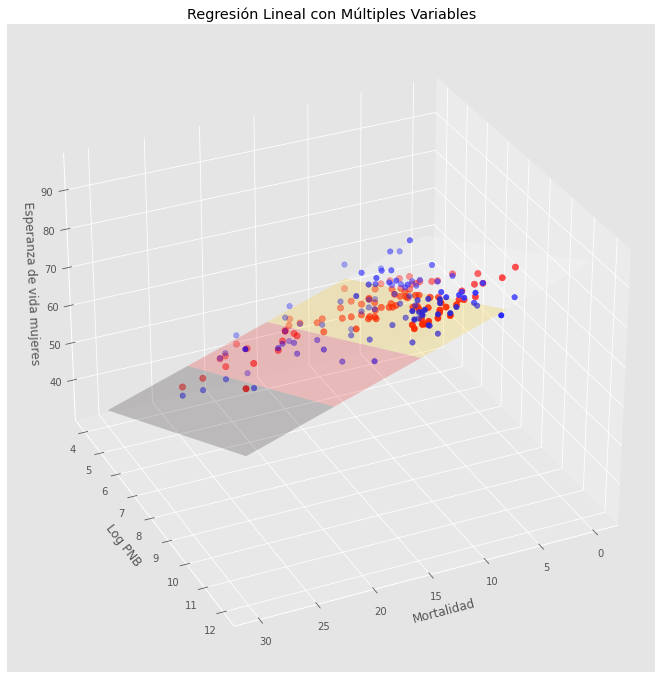

In [55]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 30, num=5), np.linspace(4, 12, num=2))

print(xx)
print(yy)

# calculamos los valores del plano para los puntos x e y


nuevoX = (regr3.coef_[0,0] * xx)
nuevoY = (regr3.coef_[0,1] * yy) 



# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr3.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(X_t2[:, 0], X_t2[:, 1], Y_t, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(X_t2[:, 0], X_t2[:, 1], Y_pred2, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Mortalidad')
ax.set_ylabel('Log PNB')
ax.set_zlabel('Esperanza de vida mujeres')
ax.set_title('Regresión Lineal con Múltiples Variables')

## Bibliografía

* Searle, S. ; Gruber, M. 2017. Linear Models. Second Edition. Jhon Willey and Sons
* Peña, D. 2002. Análisis de datos multivariantes